# Wikimedia Analysis

IMPORT

In [0]:
# Notebook-scoped library import
%pip install wordcloud

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
# Notebook-scoped library import
%pip install nltk

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.5 MB/s eta 0:00:00
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
# Notebook-scoped library import
%pip install langdetect

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=0f02cdf87fe64b0ff88b6efe1b384522adf3a2456a21f9df53232bc919eb7d2d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
# For dataset loading
import pandas as pd

# for EDA
from pyspark.sql.functions import regexp_replace, split, size, avg, round, col, trim, length, row_number, lower, collect_list, udf, regexp_extract
from pyspark.sql.types import DoubleType, StringType, ArrayType
from pyspark.sql.window import Window

# for word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# for modelling
import string
import nltk
from nltk.corpus import words as nltk_words, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from pyspark.ml.feature import Tokenizer, StopWordsRemover, RegexTokenizer, RegexTokenizer, CountVectorizer, IDF
from pyspark.ml import Pipeline
import re
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## EDA

In [0]:
# Remove files to make the next cell work
dbutils.fs.rm("dbfs:/user/hive/warehouse/wikipedia", recurse=True)

True

In [0]:
# Retrieve dataset from Amazon S3

## Load dataframe and convert to table

!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/wikipedia.csv
dataset = pd.read_csv('/databricks/driver/wikipedia.csv')
spark_df = spark.createDataFrame(dataset)
spark_df = spark_df.drop("Unnamed: 0")
spark_df.write.saveAsTable("wikipedia")

--2023-11-29 21:16:40--  https://proai-datasets.s3.eu-west-3.amazonaws.com/wikipedia.csv
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 16.12.20.2, 16.12.20.10
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|16.12.20.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1003477941 (957M) [text/csv]
Saving to: ‘wikipedia.csv’

wikipedia.csv       100%[===================>] 956.99M  19.9MB/s    in 62s     

2023-11-29 21:17:42 (15.5 MB/s) - ‘wikipedia.csv’ saved [1003477941/1003477941]



In [0]:
# Display the first five row of spark_df

display(spark_df.limit(5))

title summary documents categoria economics economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. definitions of economics over time the earlier term for the discipline was 'political economy', but since the late 19th century, it has commonly been called 'economics'. the term is ultimately derived from ancient greek οἰκονομία (oikonomia) which is a term for the "way (nomos) to run a household (oikos)", or in other words the know-how of an οἰκονομικός (oikonomikos), or "household or homestead manager". derived terms such as "economy" can therefore often mean "frugal" or "thrifty". by extension then, "political economy" was the way to manage a polis or state. there are a variety of modern definitions of economics; some reflect evolving views of the subject or different views among economists. scottish philosopher adam smith (1776) defined what was then called political economy as "an inquiry into the nature and causes of the wealth of nations", in particular as: a branch of the science of a statesman or legislator [with the twofold objectives of providing] a plentiful revenue or subsistence for the people ... [and] to supply the state or commonwealth with a revenue for the publick services. jean-baptiste say (1803), distinguishing the subject matter from its public-policy uses, def

In [0]:
# Verify given informations

## Unique values per categoria
unique_categories = spark_df.select("categoria").distinct()

## Show results
unique_categories.show()

+-----------+
|  categoria|
+-----------+
|  economics|
|   politics|
|    culture|
|    science|
|     sports|
|     energy|
|    finance|
| humanities|
|       pets|
|      trade|
| technology|
|  transport|
|   medicine|
|engineering|
|   research|
+-----------+



### Per category statistical analysis

####Number of articles per category

In [0]:
%sql

SELECT categoria, COUNT(*) as num_articles
FROM default.wikipedia
GROUP BY categoria
ORDER BY categoria;

categoria num_articles culture 10372 economics 10110 energy 10046 engineering 10220 finance 10157 humanities 10236 medicine 10076 pets 10023 politics 11358 research 10037 science 10236 sports 10068 technology 10095 trade 10068 transport 10130

####Mean number of words per category

In [0]:
# Duplicate spark_df (the original df)
# In the new spark df called cleaned_df create a col named cleaned_documents
# that contain original documents without punctuation
cleaned_df = spark_df.withColumn("cleaned_documents", regexp_replace("documents", "[^\w\s]", ""))

# Duplicate cleaned_df
# In the new spark df called word_count_df create a col named words
# that contain a list of words derived from cleaned_documents without space and multiple spaces
word_count_df = cleaned_df.withColumn("words", split("cleaned_documents", "\s+"))

# Count number of words in each doc
word_count_df = word_count_df.withColumn("word_count", size("words"))

# Mean of words per category
average_word_count = word_count_df.groupBy("categoria").agg(avg("word_count").alias("average_word_count"))

# Cast the average_word_count column to a double type
average_word_count = average_word_count.withColumn("average_word_count", average_word_count["average_word_count"].cast(DoubleType()))

# Round the average_word_count column to 2 decimal places
average_word_count = average_word_count.withColumn("average_word_count", round(average_word_count["average_word_count"], 2))

# Order the results in descending order by average_word_count
average_word_count = average_word_count.orderBy("average_word_count", ascending=False)

# Show results
average_word_count.show()

+-----------+------------------+
|  categoria|average_word_count|
+-----------+------------------+
|    science|           1854.93|
|    finance|           1847.27|
|   politics|           1512.95|
| humanities|           1042.95|
|  economics|            979.37|
| technology|            884.75|
|   medicine|            783.98|
|engineering|            721.89|
|   research|            691.57|
|      trade|            639.02|
|    culture|            634.95|
|  transport|            625.84|
|     sports|            599.06|
|     energy|             584.1|
|       pets|            420.89|
+-----------+------------------+



####Max number of words in the longest article per category

In [0]:
display(word_count_df.limit(5))

title summary documents categoria cleaned_documents words word_count economics economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. definitions of economics over time the earlier term for the discipline was 'political economy', but since the late 19th century, it has commonly been called 'economics'. the term is ultimately derived from ancient greek οἰκονομία (oikonomia) which is a term for the "way (nomos) to run a household (oikos)", or in other words the know-how of an οἰκονομικός (oikonomikos), or "household or homestead manager". derived terms such as "economy" can therefore often mean "frugal" or "thrifty". by extension then, "political economy" was the way to manage a polis or state. there are a variety of modern definitions of economics; some reflect evolving views of the subject or different views among economists. scottish philosopher adam smith (1776) defined what was then called political economy as "an inquiry into the nature and causes of the wealth of nations", in particular as: a branch of the science of a statesman or legislator [with the twofold objectives of providing] a plentiful revenue or subsistence for the people ... [and] to supply the state or commonwealth with a revenue for the publick services. jean-baptiste say (1803), distinguishing the subject matt

In [0]:
# Define a window spec partitioned by category and ordered by word count in descending order
windowSpec = Window.partitionBy("categoria").orderBy(word_count_df["word_count"].desc())

# Add a row number for each row within its window (partition)
ranked_df = word_count_df.withColumn("rank", row_number().over(windowSpec))

# Select the first row of each window, which is the longest article in that category
longest_articles_df = ranked_df.filter(ranked_df.rank == 1).drop("rank")

# Reorder the columns to have 'categoria' as the first column
columns_order = ["categoria"] + [col for col in longest_articles_df.columns if col != "categoria"]
longest_articles_df = longest_articles_df.select(*columns_order)

# Show the dataframe
longest_articles_df.show()

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|  categoria|               title|             summary|           documents|   cleaned_documents|               words|word_count|
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    finance|         king julian|this is a list of...|this is a list of...|this is a list of...|[this, is, a, lis...|     33443|
|   medicine|canada convoy pro...|a series of prote...|a series of prote...|a series of prote...|[a, series, of, p...|     18412|
|   research|      donald mallard|ncis is an americ...|ncis is an americ...|ncis is an americ...|[ncis, is, an, am...|     27211|
| technology|             twitter|twitter, currentl...|twitter, currentl...|twitter currently...|[twitter, current...|     18123|
|     energy|radiation effects...|the radiation eff...|the radiation eff...|the radiation 

####Min number of words in the shortest article per category

In [0]:
# Define a window spec partitioned by category and ordered by word count in ascending order
windowSpecShortest = Window.partitionBy("categoria").orderBy(word_count_df["word_count"].asc())

# Add a row number for each row within its window (partition), excluding null documents
ranked_shortest_df = word_count_df.filter(word_count_df.documents.isNotNull()).withColumn("rank", row_number().over(windowSpecShortest))

# Select the first row of each window, which is the shortest article in that category
shortest_articles_df = ranked_shortest_df.filter(ranked_shortest_df.rank == 1).drop("rank")

# Reorder the columns to have 'categoria' as the first column
columns_order_shortest = ["categoria"] + [col for col in shortest_articles_df.columns if col != "categoria"]
shortest_articles_df = shortest_articles_df.select(*columns_order_shortest)

# Show the dataframe (optional)
shortest_articles_df.show()

+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|  categoria|               title|             summary|           documents|   cleaned_documents|               words|word_count|
+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|    culture|         judenbüchel|judenbüchel is a ...|judenbüchel is a ...|judenbchel is a j...|[judenbchel, is, ...|        10|
|  economics|       stéphane just|stéphane just (19...|stéphane just (19...|stphane just 1921...|[stphane, just, 1...|         9|
|     energy|             n-ergie|n-ergie is an ene...|n-ergie is an ene...|nergie is an ener...|[nergie, is, an, ...|         9|
|engineering|        karpfenteich|karpfenteich is a...|karpfenteich is a...|karpfenteich is a...|[karpfenteich, is...|         8|
|    finance|companies listed ...|           == 0–9 ==|           == 0–9 ==|              

####Most representative word cloud per category

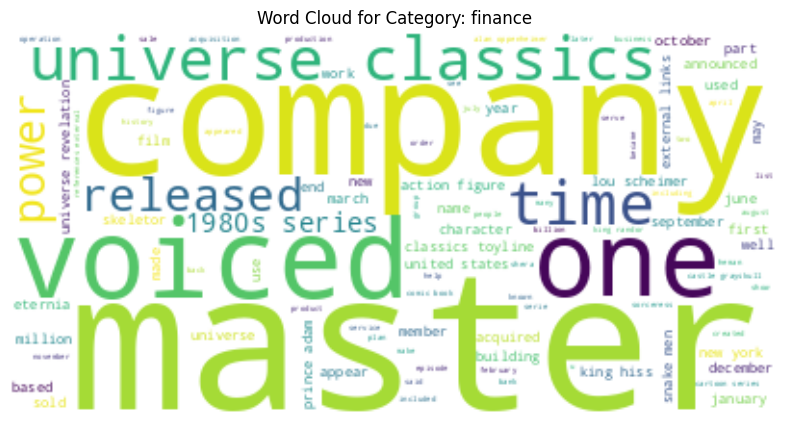

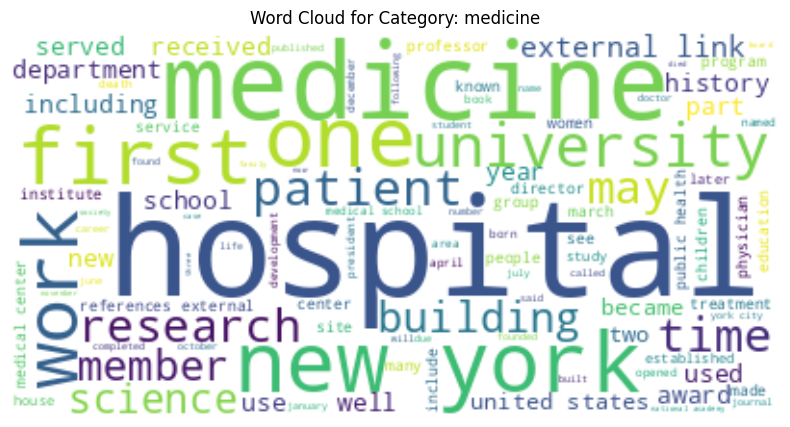

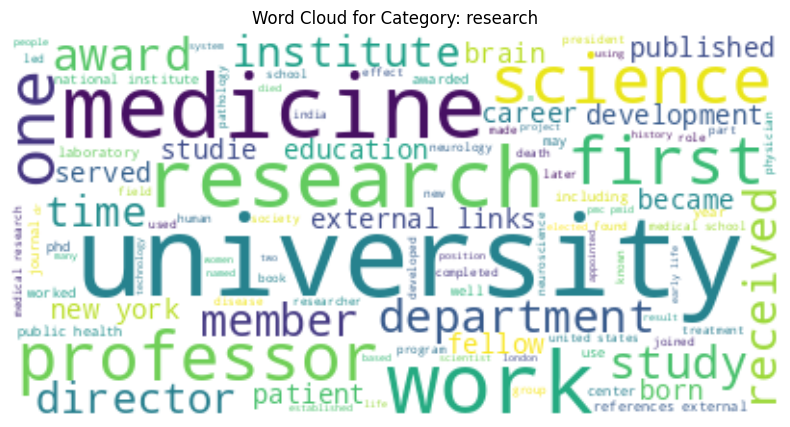

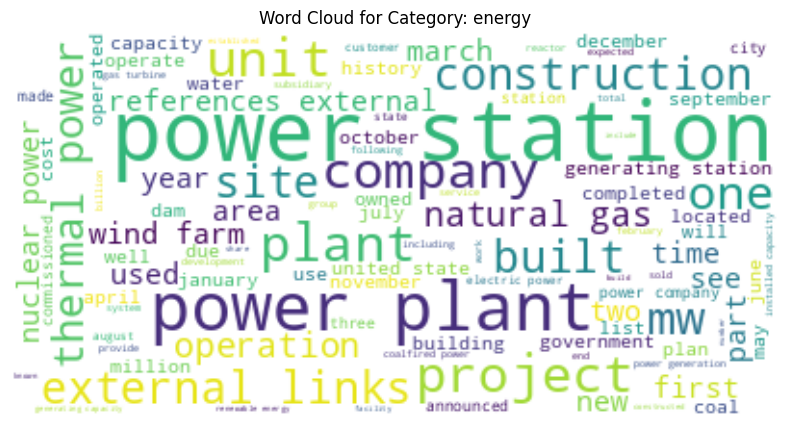

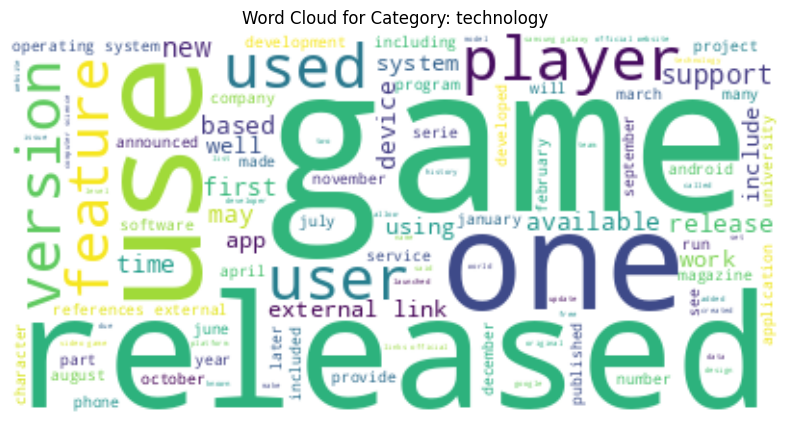

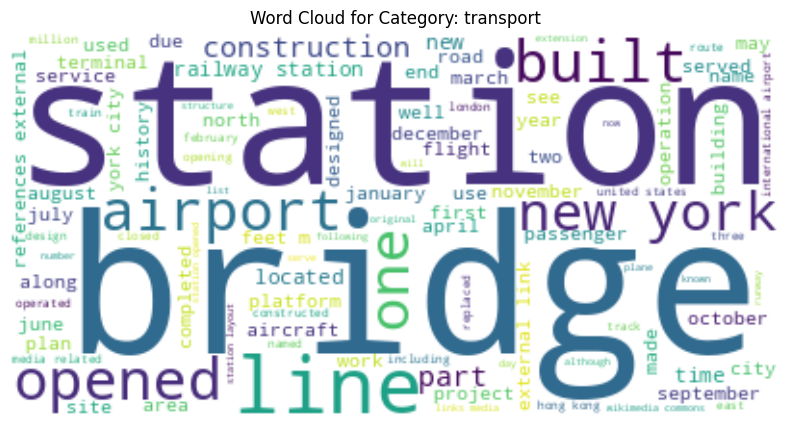

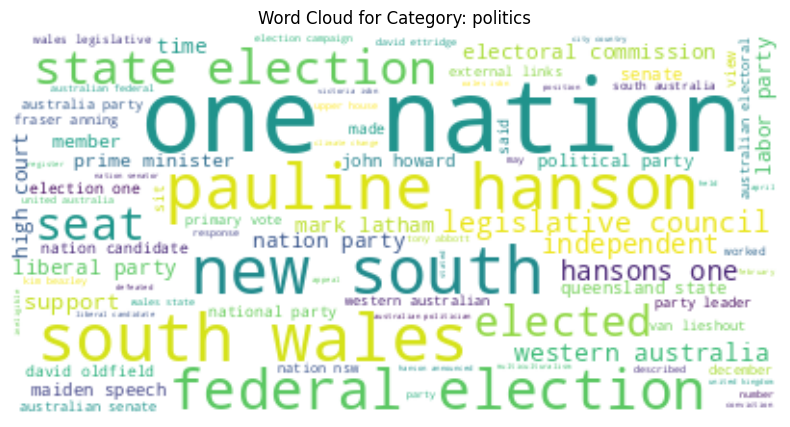

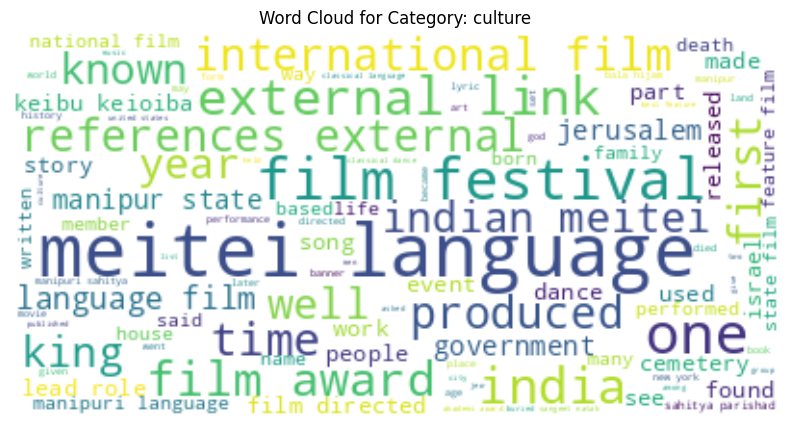

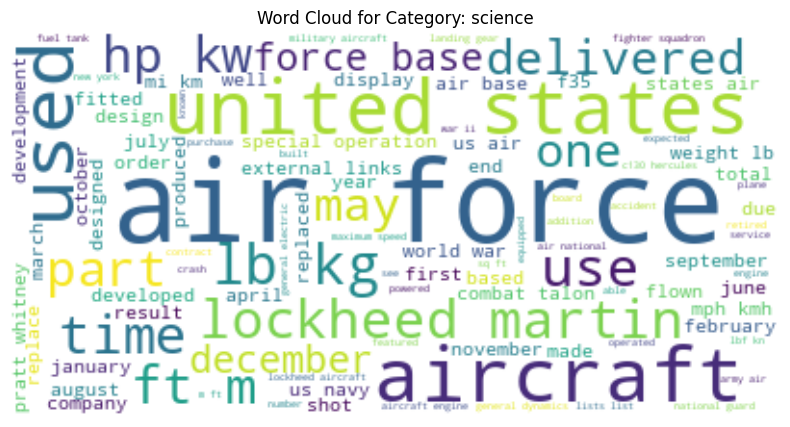

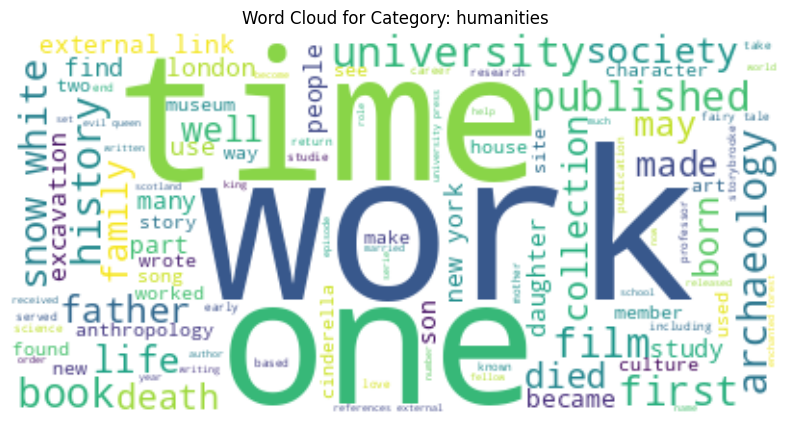

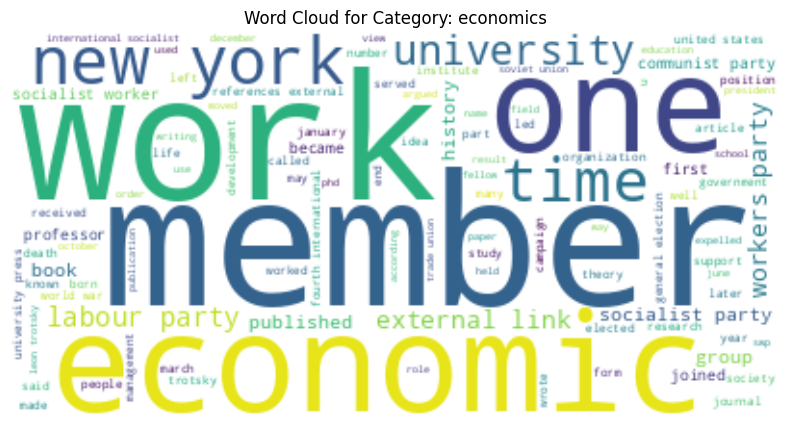

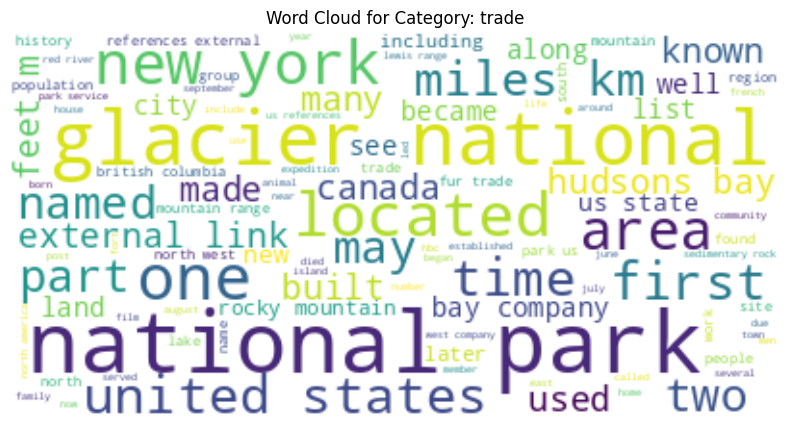

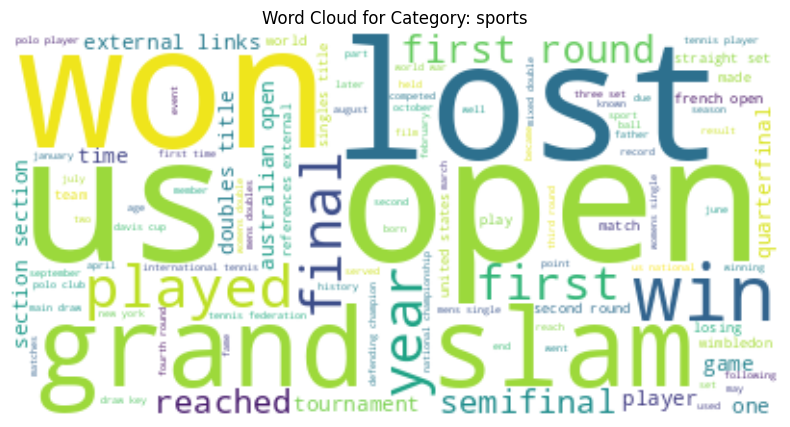

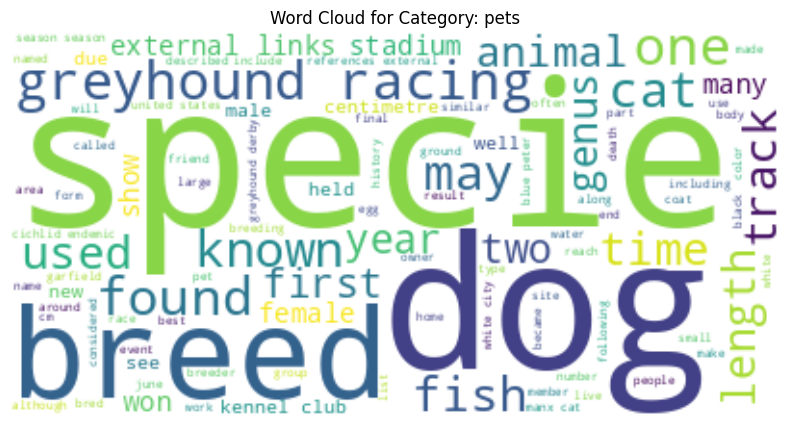

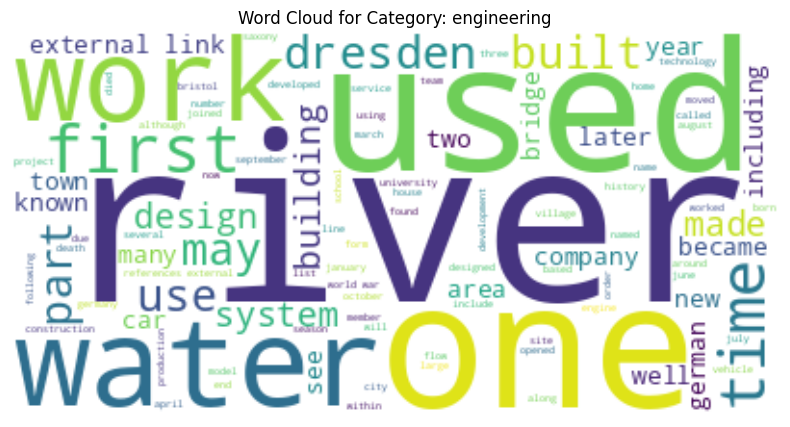

In [0]:
# Step 1: Data Cleaning
# Remove punctuation and convert in lowercase
cleaned_df = spark_df.withColumn("cleaned_text", lower(regexp_replace("documents", "[^\w\s]", "")))

# Step 2: Aggregate texts by category
categories_texts = cleaned_df.groupby("categoria").agg(collect_list("cleaned_text").alias("texts"))

# Convert to Pandas DataFrame for easier manipulation
categories_texts_pd = categories_texts.toPandas()

# Step 3: Create and display word clouds for each category
for index, row in categories_texts_pd.iterrows():
    category = row["categoria"]
    all_texts = ' '.join(row["texts"])
    
    wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue').generate(all_texts)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Category: {category}")
    plt.show()

## Textual Classifier

### Considering `summary` Col

####Data preparation

In [0]:
display(spark_df.limit(5))

title summary documents categoria economics economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. economics () is a social science that studies the production, distribution, and consumption of goods and services.economics focuses on the behaviour and interactions of economic agents and how economies work. microeconomics analyzes what's viewed as basic elements in the economy, including individual agents and markets, their interactions, and the outcomes of interactions. individual agents may include, for example, households, firms, buyers, and sellers. macroeconomics analyzes the economy as a system where production, consumption, saving, and investment interact, and factors affecting it: employment of the resources of labour, capital, and land, currency inflation, economic growth, and public policies that have impact on these elements. other broad distinctions within economics include those between positive economics, describing "what is", and normative economics, advocating "what ought to be"; between economic theory and applied economics; between rational and behavioural economics; and between mainstream economics and heterodox economics.economic analysis can be applied throughout society, including business, finance, cybersecurity, health care, engineering and government. it is also applied to such diverse subjects as crime, education, the family, feminism, law, philosophy, politics, religion, social institutions, war, science, and the environment. definitions of economics over time the earlier term for the discipline was 'political economy', but since the late 19th century, it has commonly been called 'economics'. the term is ultimately derived from ancient greek οἰκονομία (oikonomia) which is a term for the "way (nomos) to run a household (oikos)", or in other words the know-how of an οἰκονομικός (oikonomikos), or "household or homestead manager". derived terms such as "economy" can therefore often mean "frugal" or "thrifty". by extension then, "political economy" was the way to manage a polis or state. there are a variety of modern definitions of economics; some reflect evolving views of the subject or different views among economists. scottish philosopher adam smith (1776) defined what was then called political economy as "an inquiry into the nature and causes of the wealth of nations", in particular as: a branch of the science of a statesman or legislator [with the twofold objectives of providing] a plentiful revenue or subsistence for the people ... [and] to supply the state or commonwealth with a revenue for the publick services. jean-baptiste say (1803), distinguishing the subject matter from its public-policy uses, def

In [0]:
# Create a new spark dataframe from spark_df that filter only rows which summary col contains at least one word
# "a" for ex is a word that will be removed as a stopword

filtered_df = spark_df.filter(regexp_extract(col("summary"), r"\b[A-Za-z]+\b", 0) != "")

filtered_df.show()

+--------------------+--------------------+--------------------+---------+
|               title|             summary|           documents|categoria|
+--------------------+--------------------+--------------------+---------+
|           economics|economics () is a...|economics () is a...|economics|
|index of economic...|this aims to be a...|this aims to be a...|economics|
|     cryptoeconomics|cryptoeconomics i...|cryptoeconomics i...|economics|
|economic impact a...|an economic impac...|an economic impac...|economics|
|      economic trend|economic trend ma...|economic trend ma...|economics|
|    entrepreneurship|entrepreneurship ...|entrepreneurship ...|economics|
|    factor investing|factor investing ...|factor investing ...|economics|
|          filtering |in housing econom...|in housing econom...|economics|
|          free trade|free trade is a t...|free trade is a t...|economics|
|         liquidation|liquidation is th...|liquidation is th...|economics|
|       profit motive|in 

In [0]:
english_vocab = set(w.lower() for w in nltk_words.words())

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, brackets, colons, hyphens, quotes, numbers, and ellipses
    text = re.sub(r'[^\w\s]|\.+|\d+', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Filter non-English words and words with length less than 2
    words = [word for word in words if word in english_vocab and len(word) > 1]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    return words

# Register the function as a UDF
preprocess_udf = udf(preprocess_text, ArrayType(StringType()))

# Apply the preprocessing to the "summary" column
spark_df_processed = filtered_df.withColumn("words", preprocess_udf(col("summary")))

# Select the required columns, including the new 'words' column instead of the non-existent 'summary_processed'
spark_df_processed = spark_df_processed.select("title", "summary", "words", "categoria")

# Show a sample of the new dataframe for debugging
display(spark_df_processed.sample(fraction=0.1).limit(10))

title summary words categoria entrepreneurship entrepreneurship is the creation or extraction of economic value. with this definition, entrepreneurship is viewed as change, generally entailing risk beyond what is normally encountered in starting a business, which may include other values than simply economic ones. an entrepreneur is an individual who creates and/or invests in one or more businesses, bearing most of the risks and enjoying most of the rewards. the process of setting up a business is known as "entrepreneurship". the entrepreneur is commonly seen as an innovator, a source of new ideas, goods, services, and business/or procedures. more narrow definitions have described entrepreneurship as the process of designing, launching and running a new business, which is often similar to a small business, or as the "capacity and willingness to develop, organize and manage a business venture along with any of its risks to make a profit." the people who create these businesses are often referred to as "entrepreneurs". while definitions of entrepreneurship typically focus on the launching and running of businesses, due to the high risks involved in launching a start-up, a significant proportion of start-up businesses have to close due to "lack of funding, bad business decisions, government policies, an economic crisis, a lack of market demand, or a combination of all of these."in the field of economics, the term entrepreneur is used for an entity which has the ability to translate inventions or technologies into products and services. in this sense, entrepreneurship describes activities on the part of both established firms and new businesses. List(entrepreneurship, creation, extract, econom, valu, definit, entrepreneurship, chang, general, risk, beyond, normal, start, busi, may, includ, simpli, econom, entrepreneur, individu, one, bear, enjoy, process, set, busi, known, entrepreneurship, entrepreneur, common, seen, innov, sourc, new, good, narrow, entrepreneurship, process, design, run, new, busi, often, similar, small, busi, capac, willing, develop, organ, manag, busi, ventur, along, make, profit, peopl, creat, often, entrepreneurship, typic, focus, run, due, high, involv, signific, proport, close, due, lack, bad, busi, govern, econom, crisi, lack, market, demand, combin, field, econom, term, entrepreneur, use, entiti, abil, translat, sens, entrepreneurship, part, establish, new) economics liquidation liquidation is the process in accounting by which a company is brought to an end in canada, united kingdom, united states, ireland, australia, new zealand, italy, and many other countries. the assets and property of the company are redistributed. liquidation is also sometimes referred to as winding-up or dissolution, although dissolution technically refers to the last stage of liquidation. the process of liquidation also arises when customs, an authority or agency in a country responsible for collecting and safeguarding customs duties, determines the final computation or ascertainment of the duties or drawback accruing on an entry.liquidation may either be compulsory (sometimes referred to as a creditors' liquidation or receivership following bankruptcy, which may result in the court creating a "liquidation trust"; or sometimes a court can mandate the appointment of a liquidator e.g. wind-up order in australia) or voluntary (sometimes referred to as a shareholders' liquidation or members' liquidation, although some voluntary liquidations are controlled by the creditors). the term "liquidation" is also sometimes used informally to describe a company seeking to divest of some of its assets. for instance, a retail chain may wish to close some of its stores. for efficiency's sake, it will often sell these at a discount to a company specializing in real estate liquidation instead of becoming involved in an area it may lack sufficient expertise in to operate with maximum profitability. a company may also operate in a "receivership-like

####TF-IDF

In [0]:
# Create a CountVectorizer to convert the 'words' array into term frequency vectors
countVectorizer = CountVectorizer(inputCol="words", outputCol="raw_features")

# Create an IDF to convert term frequency vectors into TF-IDF vectors
idf = IDF(inputCol="raw_features", outputCol="features")

# Create a pipeline with the sequence of the operations
pipeline = Pipeline(stages=[countVectorizer, idf])

# Fit the pipeline to the dataset
pipeline_model = pipeline.fit(spark_df_processed)

# Transform the dataset
spark_df_tfidf = pipeline_model.transform(spark_df_processed)

# Now you can select the 'title', 'features', and 'categoria' for the final dataset
finalized_data = spark_df_tfidf.select("title", "features", "categoria")

# Split the data into training and test sets (e.g., 70% training and 30% testing)
train_data, test_data = finalized_data.randomSplit([0.7, 0.3])

#### Model

In [0]:
# Convert label into numerical format
indexer = StringIndexer(inputCol="categoria", outputCol="label")

# Fit the indexer on the training data and transform both training and test data
indexer_model = indexer.fit(train_data)
train_data = indexer_model.transform(train_data)
test_data = indexer_model.transform(test_data)

In [0]:
lr = LogisticRegression(featuresCol="features", labelCol="label")

model = lr.fit(train_data)

In [0]:
predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

print("Accuracy:", accuracy)

Accuracy: 0.8984333859926277


### Considering `documents` Col

In [0]:
filtered_documents_df = spark_df.filter(regexp_extract(col("documents"), r"\b[A-Za-z]+\b", 0) != "")

total_rows = filtered_documents_df.count()

# Pick 50% of rows to avoid Cluster shut down cause lack of resources to handle all dataset
half_rows = int(total_rows * 0.5)

# Suffle the dataset
reduced_filtered_documents_df = filtered_documents_df.sample(withReplacement=False, fraction=0.5).limit(half_rows)


reduced_filtered_documents_df.show()

+--------------------+--------------------+--------------------+---------+
|               title|             summary|           documents|categoria|
+--------------------+--------------------+--------------------+---------+
|index of economic...|this aims to be a...|this aims to be a...|economics|
|     cryptoeconomics|cryptoeconomics i...|cryptoeconomics i...|economics|
|    factor investing|factor investing ...|factor investing ...|economics|
|          filtering |in housing econom...|in housing econom...|economics|
|          free trade|free trade is a t...|free trade is a t...|economics|
|       profit motive|in economics, the...|in economics, the...|economics|
|organizational ec...|organizational ec...|organizational ec...|economics|
|       awudu abdulai|awudu abdulai (bo...|awudu abdulai (bo...|economics|
|    jock r. anderson|jock robert ander...|jock robert ander...|economics|
|    anne van den ban|anne willem van d...|anne willem van d...|economics|
|      chuck benbrook|cha

In [0]:
english_vocab = set(w.lower() for w in nltk_words.words())

def preprocess_text_documents(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, brackets, colons, hyphens, quotes, numbers, and ellipses
    text = re.sub(r'[^\w\s]|\.+|\d+', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Filter non-English words and words with length less than 2
    words = [word for word in words if word in english_vocab and len(word) > 1]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = SnowballStemmer("english")
    words = [stemmer.stem(word) for word in words]
    return words

preprocess_documents_udf = udf(preprocess_text_documents, ArrayType(StringType()))

spark_df_documents_processed = reduced_filtered_documents_df.withColumn("processed_documents", preprocess_documents_udf(col("documents")))

spark_df_documents_processed = spark_df_documents_processed.select("title", "documents", "processed_documents", "categoria")

display(spark_df_documents_processed.sample(fraction=0.1).limit(10))

title documents processed_documents categoria peter berck peter berck (april 26, 1950 – august 10, 2018) was an american economist. berck studied mathematics and economics at the university of california, berkeley, and completed a doctorate in economics from the massachusetts institute of technology in 1976. berck returned to berkeley as a faculty member and was named the s.j. hall professor of forest economics. background berck grew up in new york, attended uc berkeley, and earned a phd in economics from mit. returning to berkeley, he spent his academic career of nearly 42 years in uc berkeley's department of agricultural & resource economics, college of natural resources.berck was an environmental economist focusing on farming, forests, fisheries, pollution, and energy. == references == List(peter, april, august, american, economist, studi, mathemat, econom, univers, california, doctor, econom, institut, technolog, return, faculti, member, hall, professor, forest, econom, background, grew, new, york, econom, spent, academ, career, near, depart, agricultur, resourc, econom, colleg, natur, environment, economist, farm, pollut, energi) economics hal gordon hal giuliani gordon (born august 24, 1987) is an american economist and former hot dog vendor. he is best known for selling hot dogs at oakland athletics games from 2015 to 2022, during which time he became known as an unofficial mascot for the team. career gordon was born and raised in riverwoods, illinois, in the chicago metropolitan area. his first jobs were selling hot dogs during chicago cubs and chicago white sox games at wrigley field and u.s. cellular field, which he began in the summer of 2005 between high school and college. as he moved from city to city, gordon took on vending jobs in chicago (selling during cubs, white sox and blackhawks games), washington, d.c. (at nationals games) and, from 2015, the bay area with the san francisco giants, oakland athletics and oakland raiders (before their relocation to las vegas). while he worked at oakland athletics games, gordon became known as an unofficial mascot for the team, leading fans in cheers while selling hot dogs in his signature red-and-white striped vest, for which he has received mentions on athletics broadcasts and coverage in local news media. gordon credited late oakland a's vendor james graff for inspiring him to adopt a retro vending aesthetic and focus on entertainment and cheerleading. gordon was known for having his own baseball cards and merchandise. for the 2020 major league baseball season, during which fans (and vendors) were not present at games due to the covid-19 pandemic, gordon was represented by a cardboard cutout at the oakland coliseum and ran an online campaign to raise money for out-of-work vendors. writing in an op-ed, gordon voiced his support for the proposed howard terminal ballpark.gordon did not return to vend for the 2023 season, instead choosing to focus on his academic career. gordon is a public critic of the planned oakland athletics relocation to las vegas. gordon has argued that athletics owner john fisher "murdered baseball" in oakland and has characterized the franchise as "[viewing] their fans as another one of their enemies." gordon was involved in organizing the "reverse boycott" protest against the athletics' proposed relocation. personal life gordon earned a phd in agricultural and resource economics at the university of california, berkeley in december 2022. he resides in san francisco with his wife, who is an evictions defense attorney. despite working as a hot dog vendor, gordon is a vegetarian. references external links hal the hot dog guy on twitter hal giuliani gordon publications indexed by google scholar hal gordon at the university of california, berkeley List(hal, gordon, born, august, american, economist, former, hot, dog, vendor, best, known, sell, hot, dog, athlet, time, known, unoffici, mascot, team, career, gordon, born, rais, illinoi, metropolitan, area, 

In [0]:
countVectorizer_documents = CountVectorizer(inputCol="processed_documents", outputCol="raw_features_documents")

idf_documents = IDF(inputCol="raw_features_documents", outputCol="features_documents")

pipeline_documents = Pipeline(stages=[countVectorizer_documents, idf_documents])

pipeline_model_documents = pipeline_documents.fit(spark_df_documents_processed)

spark_df_documents_tfidf = pipeline_model_documents.transform(spark_df_documents_processed)

finalized_data_documents = spark_df_documents_tfidf.select("title", "features_documents", "categoria")

train_data_documents, test_data_documents = finalized_data_documents.randomSplit([0.7, 0.3])

In [0]:
indexer_documents = StringIndexer(inputCol="categoria", outputCol="label_documents")

indexer_model_documents = indexer_documents.fit(train_data_documents)
train_data_documents = indexer_model_documents.transform(train_data_documents)
test_data_documents = indexer_model_documents.transform(test_data_documents)

In [0]:
lr_documents = LogisticRegression(featuresCol="features_documents", labelCol="label_documents")

model_documents = lr_documents.fit(train_data_documents)

In [0]:
predictions_documents = model_documents.transform(test_data_documents)

evaluator_documents = MulticlassClassificationEvaluator(labelCol="label_documents", predictionCol="prediction", metricName="accuracy")
accuracy_documents = evaluator_documents.evaluate(predictions_documents)

print("Accuracy (Documents):", accuracy_documents)

Accuracy (Documents): 0.8883301998163613


#Conclusion

Text Classifier 1 is a bit better than Text Classifier 2.
We have to underline the fact that we had to work with 50% dataset for Text Classifier 2 cause a lack of calculus resources.